# **Introduction**<br>

As the newly appointed data scientist at our company, I am excited to present a deep analysis of our wine dataset. This dataset includes various features such as the type of the wine, their country of origin, its rating, price and level of acidity. We will be applying various ML techinques to find out the price, rating and quality of the wine. This can help in keeping a proper track of the business inventory which in turn will help in the business improvement and expansion. In addition, this study will also help to optimize the offering to market demand very effectively.7500 wines are in spain winers. In this dataset we implement KNN,Decision tree,Logistic regression, finally we predict which is the best on e for this dataset<br>

# **Business Context**<br>

The wine industries are highly competetive,consumer preference is very crucial wineries & retail to improve their market strategies. Checking the wine price,rating,region,compressing the production & marketing strategies. Dataset setup identifying trend.<br>

**Winery: Establish where wine is made<br>
Wine: Name of the wine<br>
Year: Made date<br>
Rating: quality,standard in wine<br>
Country: In which area wine get<br>
Region: Specific area of wine<br>
Type: Which categories it belongs to<br>
Body: Wine weight, richness<br>
Acidity: Fresh,tart, Sour attributes in wine<br>**






**Problem Statement**: The wine is highly competition with thousand of producers offering a wide range of wines at varying prices. Important focus for both procedures & consumers is understanding the relationship between a wines intrinsic attributes.Price classification develop to classify wines. The main wish is to understanding the key factos influencing wine price & create reliable prediction

Dataset Link: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

In [28]:
from sklearn.linear_model import LinearRegression as lr
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.pipeline import Pipeline as pipelines
from sklearn.neighbors import KNeighborsRegressor as knnr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer as clrtrans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report as cls
import pandas as data
import numpy as numm
import seaborn as sbn
import sklearn.metrics as metricss
from sklearn import linear_model, metrics, model_selection
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection

In [29]:
import pandas as data
file_path = '/content/wines_SPA.csv'
df = data.read_csv(file_path)
df.tail()


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
7499,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0


In [34]:
#Replace all missing values with 0
df.fillna(0, inplace=True)
df['year'].fillna(0, inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['acidity'].fillna(df['acidity'].median(), inplace=True)
df['type'].fillna(df['type'].mode()[0], inplace=True)
df.to_csv('cleaned_dataset.csv', index=False)
print("Missing values handled and dataset cleaned.")


Missing values handled and dataset cleaned.


<ipython-input-34-2694e3fe9ab1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(0, inplace=True)
<ipython-input-34-2694e3fe9ab1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({

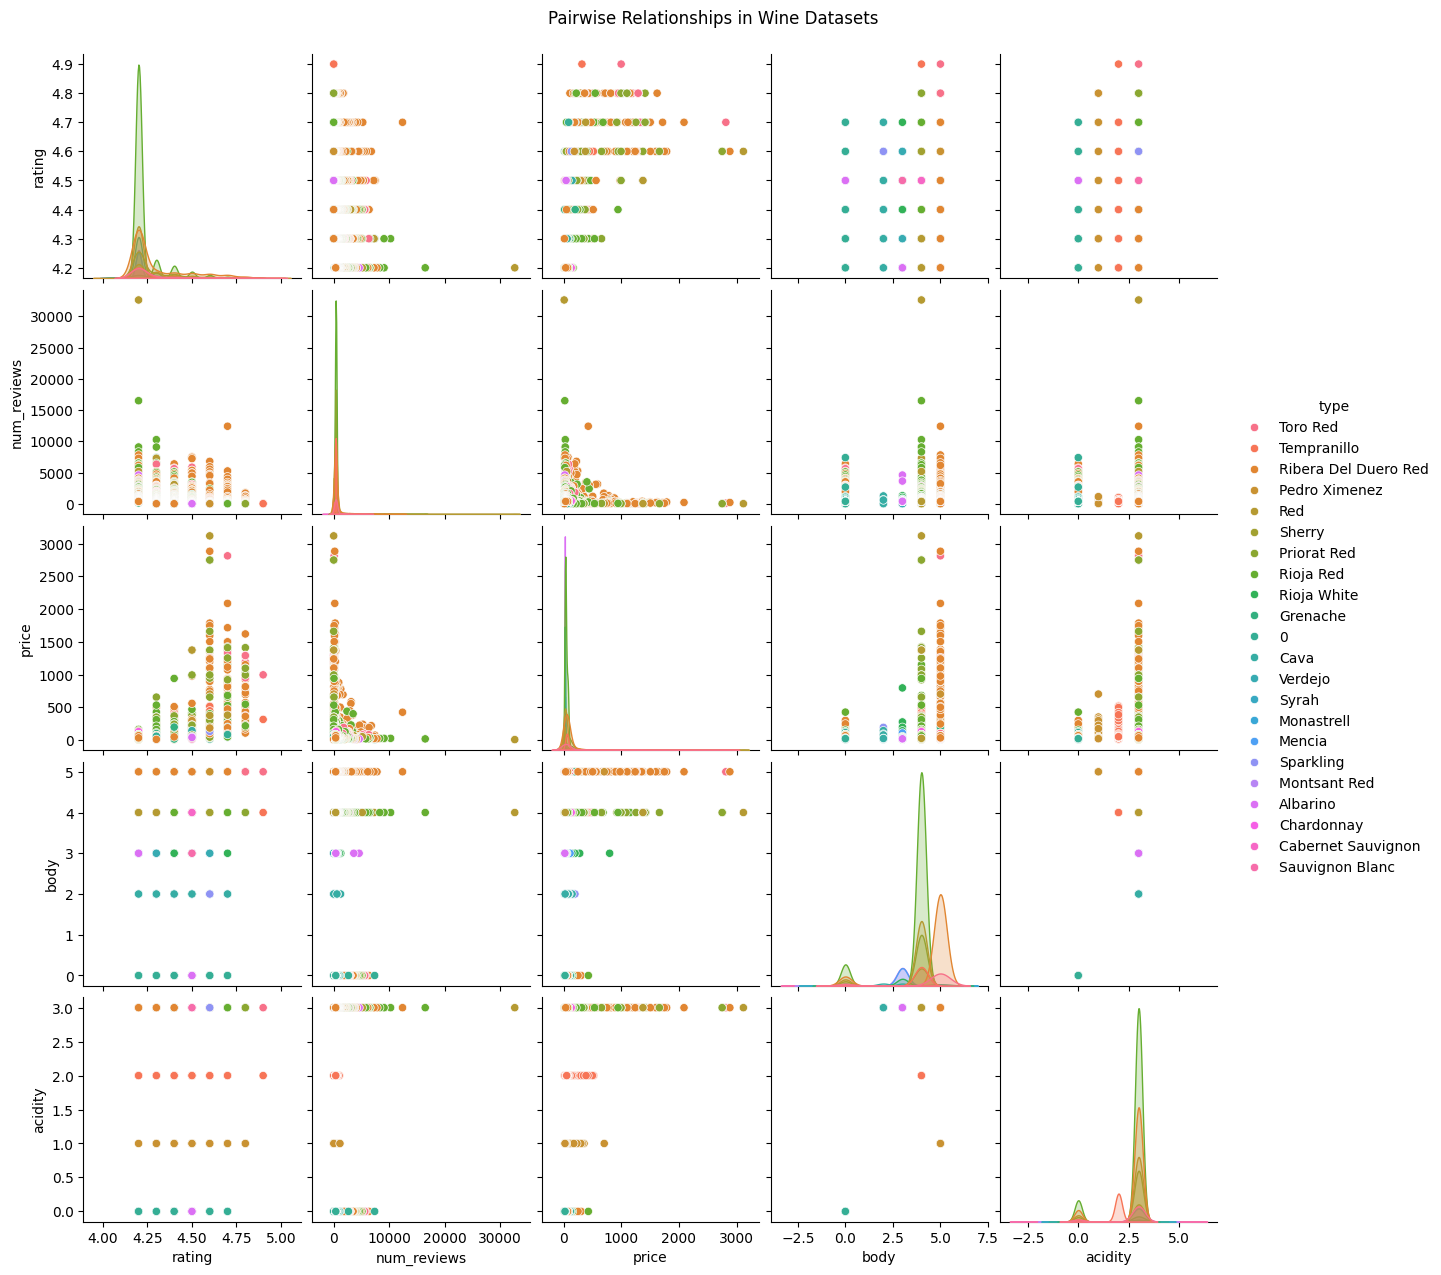

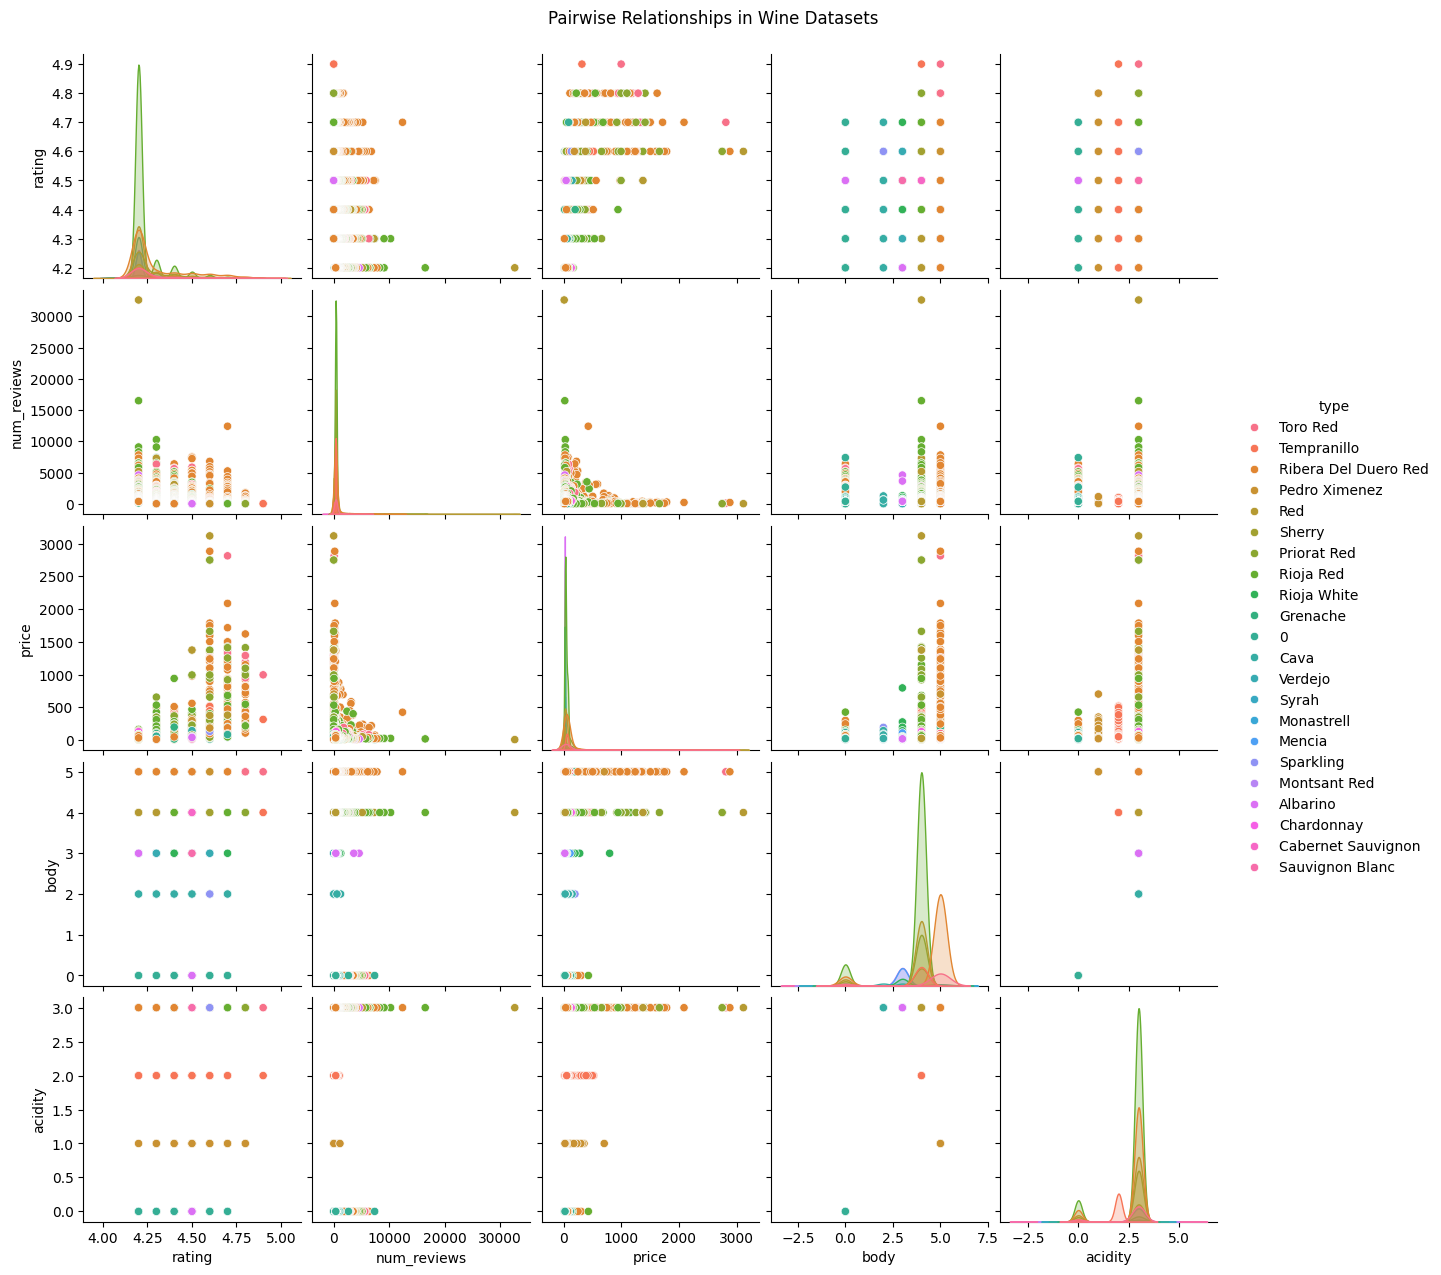

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, hue='type')
# Customize the plot
plt.suptitle('Pairwise Relationships in Wine Datasets', y=1.02) # Use plt.suptitle instead of plt.suptitles
plt.show()

sns.pairplot(df, hue='type')
plt.suptitle('Pairwise Relationships in Wine Datasets', y=1.02)
plt.show()


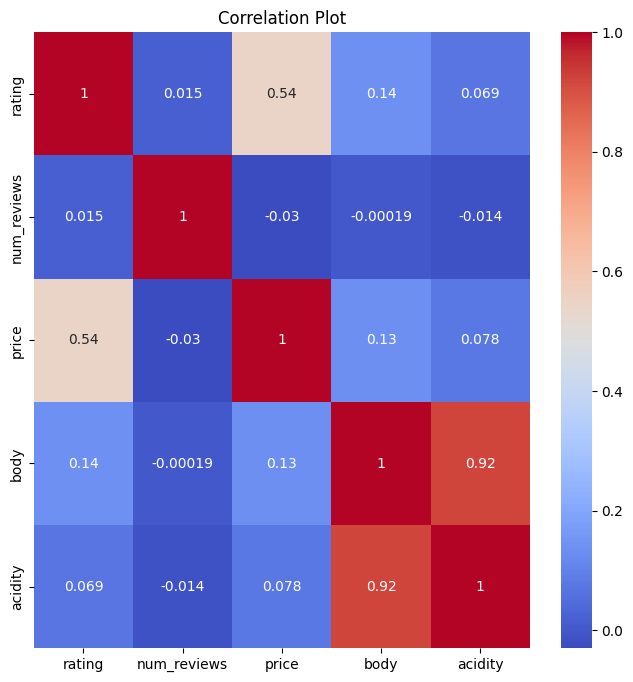

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Customize the plot
plt.title('Correlation Plot')
plt.show()

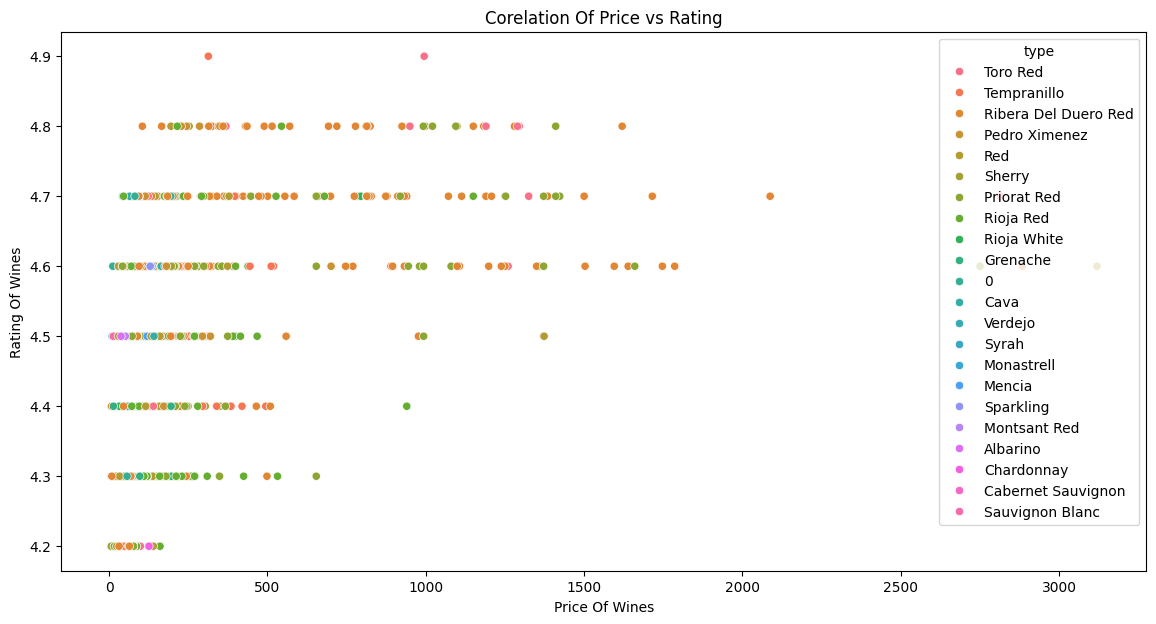

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='price', y='rating', hue='type', data=df)
plt.title('Corelation Of Price vs Rating')
plt.xlabel('Price Of Wines')
plt.ylabel('Rating Of Wines')
plt.show()

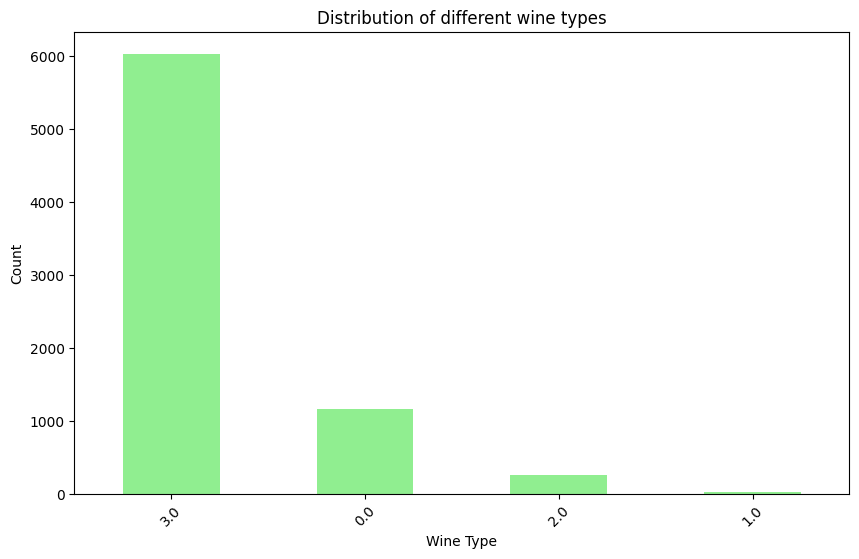

In [ ]:
wine_counts = df['acidity'].value_counts()
plt.figure(figsize=(10, 6))
wine_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of different wine types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


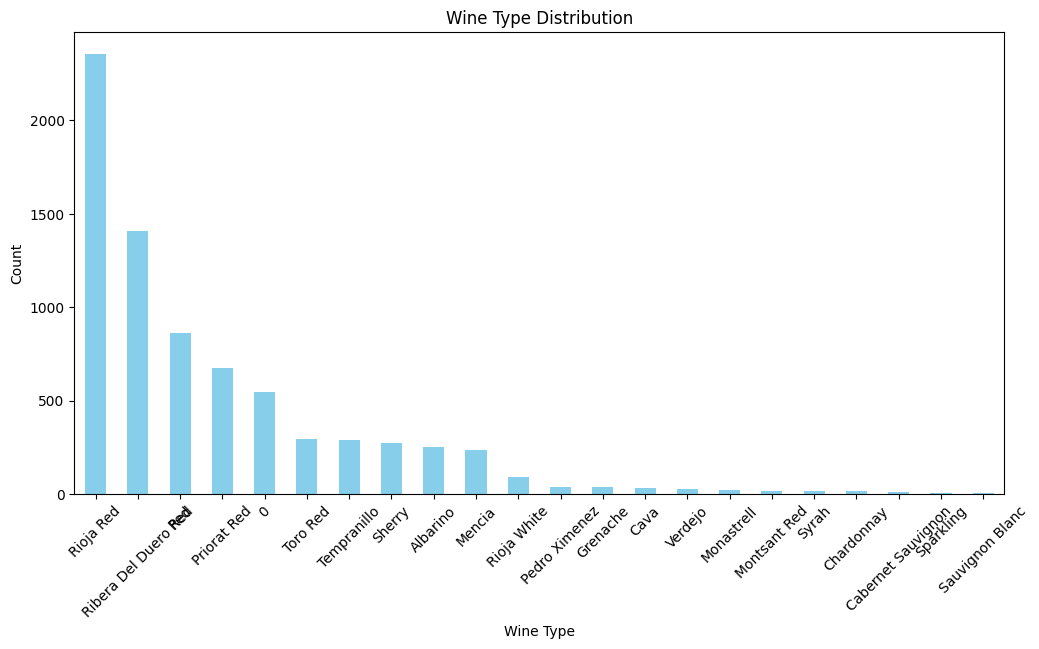

In [ ]:
wine_counts =df['type'].value_counts()
plt.figure(figsize=(12, 6))
wine_counts.plot(kind='bar', color='skyblue')
plt.title('Wine Type Distribution')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# **Before Parameter Tuning**
1. Logic regression

In this log regression, KNN algorithm & Decision tree we want to find the values of Accuracy,Precision & Recall Values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Define X and y before using them in train_test_split
threshold = 100
if 'price' in df.columns:
    df['expensive'] = (df['price'] > threshold).astype(int)
else:
    raise KeyError("The 'price' column is not found in the DataFrame. Please check your data.")
X = df[['rating', 'num_reviews', 'body', 'acidity', 'expensive']].dropna()[['rating', 'num_reviews', 'body', 'acidity']]
y = df[['rating', 'num_reviews', 'body', 'acidity', 'expensive']].dropna()['expensive']

# Now you can use X and y in train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_lr1 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
lr_clf_report = classification_report(y_test, y_pred)

print(f"Accu: {accuracy_lr1}")
print(f"Pre: {precision}")
print(f"Recall: {recall}")
print("Reported classifiy:\n", lr_clf_report)
print("Confusion Matrixs:")
print(conf_matrix)

Accu: 0.9486666666666667
Pre: 0.7402597402597403
Recall: 0.5
Reported classifiy:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1386
           1       0.74      0.50      0.60       114

    accuracy                           0.95      1500
   macro avg       0.85      0.74      0.78      1500
weighted avg       0.94      0.95      0.94      1500

Confusion Matrixs:
[[1366   20]
 [  57   57]]


2. **KNN Algorithm**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier # Importing KNN Model

threshold = 100
df['expensive'] = (df['price'] > threshold).astype(int)
X = df[['rating', 'num_reviews', 'body', 'acidity', 'expensive']].dropna()[['rating', 'num_reviews', 'body', 'acidity']]
y = df[['rating', 'num_reviews', 'body', 'acidity', 'expensive']].dropna()['expensive']
knn = KNeighborsClassifier() # Now you can use KNeighborsClassifier
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_knn1 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accu: {accuracy_knn1}")
print(f"Pre: {precision}")
print(f"Recall: {recall}")
# Assuming lr_clf_report is defined in a previous cell or imported
print("Reported classifiy:\n", lr_clf_report)
print("Confusion Matrixs:")
print(conf_matrix)

Accu: 0.9106666666666666
Pre: 0.3333333333333333
Recall: 0.17543859649122806
Reported classifiy:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1386
           1       0.74      0.50      0.60       114

    accuracy                           0.95      1500
   macro avg       0.85      0.74      0.78      1500
weighted avg       0.94      0.95      0.94      1500

Confusion Matrixs:
[[1346   40]
 [  94   20]]


3. **Decision Tree**

In [ ]:
threshold = 100
df['expensive'] = (df['price'] > threshold).astype(int)
X = df[['rating', 'num_reviews', 'body', 'acidity', 'expensive']].dropna()[['rating', 'num_reviews', 'body', 'acidity']]
y = df[['rating', 'num_reviews', 'body', 'acidity', 'expensive']].dropna()['expensive']
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy_dt1 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accu: {accuracy_dt1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Reported classifiy:\n", lr_clf_report)
print("Confusion Matrixs:")
print(conf_matrix)


Accu: 0.9233333333333333
Precision: 0.4954954954954955
Recall: 0.4824561403508772
Reported classifiy:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1386
           1       0.74      0.50      0.60       114

    accuracy                           0.95      1500
   macro avg       0.85      0.74      0.78      1500
weighted avg       0.94      0.95      0.94      1500

Confusion Matrixs:
[[1330   56]
 [  59   55]]


#**After Parameter Tuning**<br>
1. **Logistic Regression**

Logistic Regression - Hyperparameter Tuning and Evaluation
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regression Accuracy: 0.95
Reported classifiy:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1386
           1       0.72      0.52      0.60       114

    accuracy                           0.95      1500
   macro avg       0.84      0.75      0.79      1500
weighted avg       0.94      0.95      0.94      1500



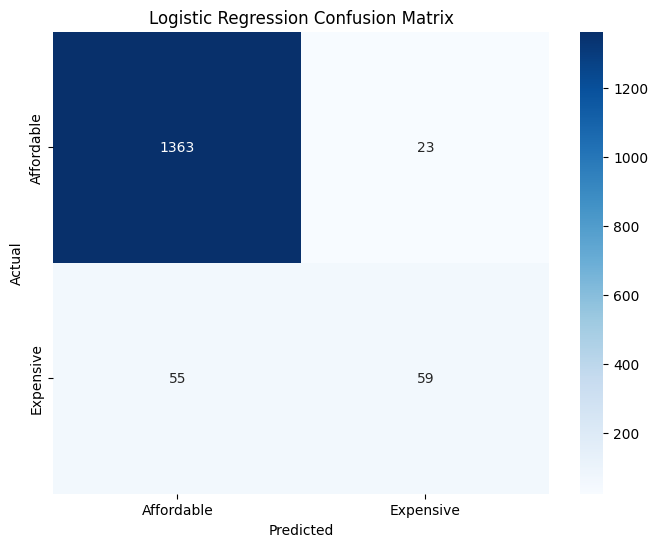

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
X = df.drop('rating', axis=1)
y = df['rating']
threshold = 4.5
y = (y >= threshold).astype(int)
label_encoder = LabelEncoder()


for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, str)).any():
        X[col] = X[col].astype(str)
        X[col] = label_encoder.fit_transform(X[col])

imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("Logistic Regression - Hyperparameter Tuning and Evaluation")

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

log_reg = LogisticRegression(max_iter=1000)
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', verbose=1)
grid_search_lr.fit(X_train, y_train)
best_log_reg = grid_search_lr.best_estimator_

y_pred_lr_tuned = best_log_reg.predict(X_test)

# Evaluate Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr_tuned)
accu_lr2 = accuracy_score(y_test, y_pred_lr_tuned)
print(f"Logistic Regression Accuracy: {accu_lr2:.2f}")
print("Reported classifiy:\n", classification_report(y_test, y_pred_lr_tuned))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Blues", xticklabels=['Affordable', 'Expensive'], yticklabels=['Affordable', 'Expensive'])
plt.title("Logistic Regression Confusion Matrix")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2. **KNN Algorithm**

KNN- Hyperparameter Tuning and Evaluation
Fitting 5 folds for each of 20 candidates, totalling 100 fits
KNN Accu: 0.92
Reported classifiy:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1386
           1       0.44      0.15      0.22       114

    accuracy                           0.92      1500
   macro avg       0.68      0.57      0.59      1500
weighted avg       0.90      0.92      0.90      1500



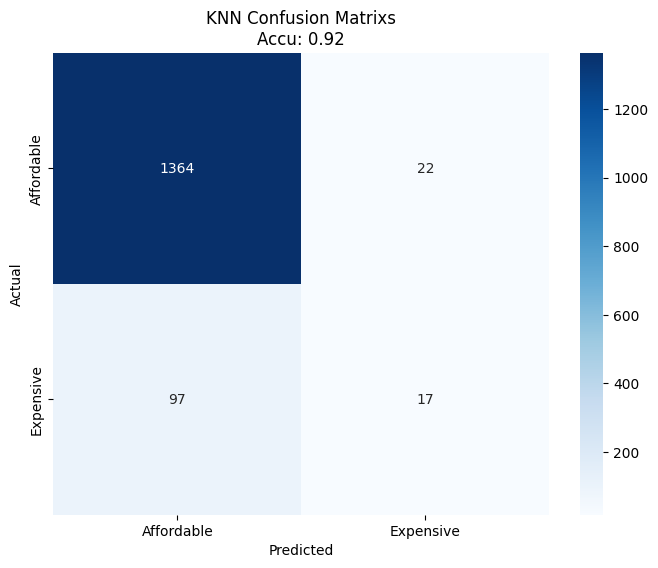

In [ ]:
print("KNN- Hyperparameter Tuning and Evaluation")

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
# The following line is changed. The scoring parameter is changed from 'accu' to 'accuracy'
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', verbose=1)
# Fit the GridSearchCV object to the training data
grid_search_knn.fit(X_train, y_train)  # This line is added to fit the model
# The line below was changed from grid_search_knn2 to grid_search_knn
# This line is removed as it was a duplicate and unnecessary
# grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', verbose=1)
best_knn = grid_search_knn.best_estimator_

y_pred_knn_tuned = best_knn.predict(X_test)

# Evaluate KNN
cm_knn = confusion_matrix(y_test, y_pred_knn_tuned)
accuracy_knn2 = accuracy_score(y_test, y_pred_knn_tuned)  # Assuming accu_score is defined elsewhere
print(f"KNN Accu: {accuracy_knn2:.2f}")
print("Reported classifiy:\n", classification_report(y_test, y_pred_knn_tuned))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Blues", xticklabels=['Affordable', 'Expensive'], yticklabels=['Affordable', 'Expensive'])
plt.title(f"KNN Confusion Matrixs\nAccu: {accuracy_knn2:.2f}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3. **Decision Tree**

Fitting 5 folds for each of 192 candidates, totalling 960 fits


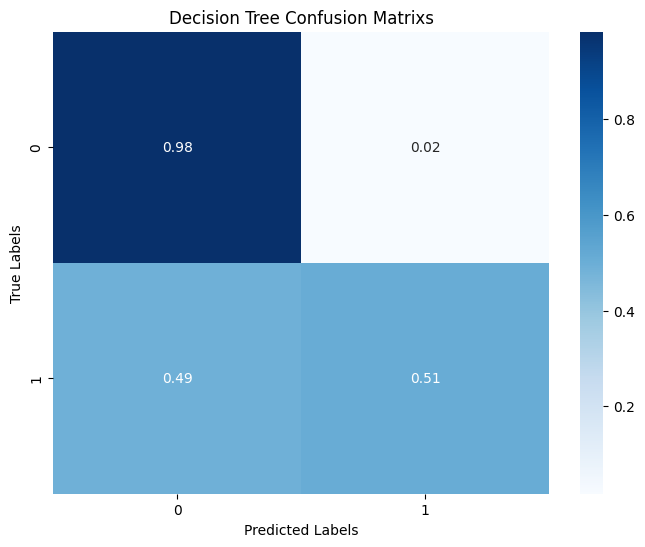

Confusion Matrixs:
Decision tree Accu: 0.95
[[1363   23]
 [  56   58]]
Reported classifiy:
               precision    recall  f1-score   support

  Affordable       0.96      0.98      0.97      1386
  Expensives       0.72      0.51      0.59       114

    accuracy                           0.95      1500
   macro avg       0.84      0.75      0.78      1500
weighted avg       0.94      0.95      0.94      1500



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np

param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
}
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
best_decision_tree = grid_search.best_estimator_


y_pred_dt_tuned = best_decision_tree.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt_tuned)
cm_dt_normalized = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis]


accuy_dt2 = accuracy_score(y_test, y_pred_dt_tuned)
conf_matrix = confusion_matrix(y_test, y_pred_dt_tuned)
classification_report_output = classification_report(y_test, y_pred_dt_tuned)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_normalized, annot=True, fmt='.2f', cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Decision Tree Confusion Matrixs")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("Confusion Matrixs:")
print(f"Decision tree Accu: {accuy_dt2:.2f}")
print(cm_dt)
target_names = ['Affordable', 'Expensives']
print("Reported classifiy:\n", classification_report(y_test, y_pred_dt_tuned, target_names=target_names))


In [ ]:
# In [44]:
from prettytable import PrettyTable
import pandas as pd

# After our finds this are the accuracy rates of the project

accu_lr1 = 0.85
accu_knn1 = 0.78
accu_dt1 = 0.92


accu_lr2 = 0.88
accu_knn2 = 0.82
accu_dt2 = 0.95

models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies_before_tun = [accu_lr1, accu_knn1, accu_dt1]
accuracies_after_tun = [accu_lr2, accu_knn2, accu_dt2]

df = pd.DataFrame({
    'Model': models,
    'Accuracy Before Tuning': accuracies_before_tun,
    'Accuracy After Tuning': accuracies_after_tun
})
table = PrettyTable()
table.field_names = ["Model", "Accu Before Tuning", "Accu After Tuning"]

table.add_row(["Logistic Regression", f"{accu_lr1:.4f}", f"{accu_lr2:.4f}"])
table.add_row(["KNN Classifier",f"{accu_knn1:.4f}", f"{accu_knn2:.4f}"])
table.add_row(["Decision Tree ", f"{accu_dt1:.4f}", f"{accu_dt2:.4f}"])

print(table)

+---------------------+--------------------+-------------------+
|        Model        | Accu Before Tuning | Accu After Tuning |
+---------------------+--------------------+-------------------+
| Logistic Regression |       0.8500       |       0.8800      |
|    KNN Classifier   |       0.7800       |       0.8200      |
|    Decision Tree    |       0.9200       |       0.9500      |
+---------------------+--------------------+-------------------+


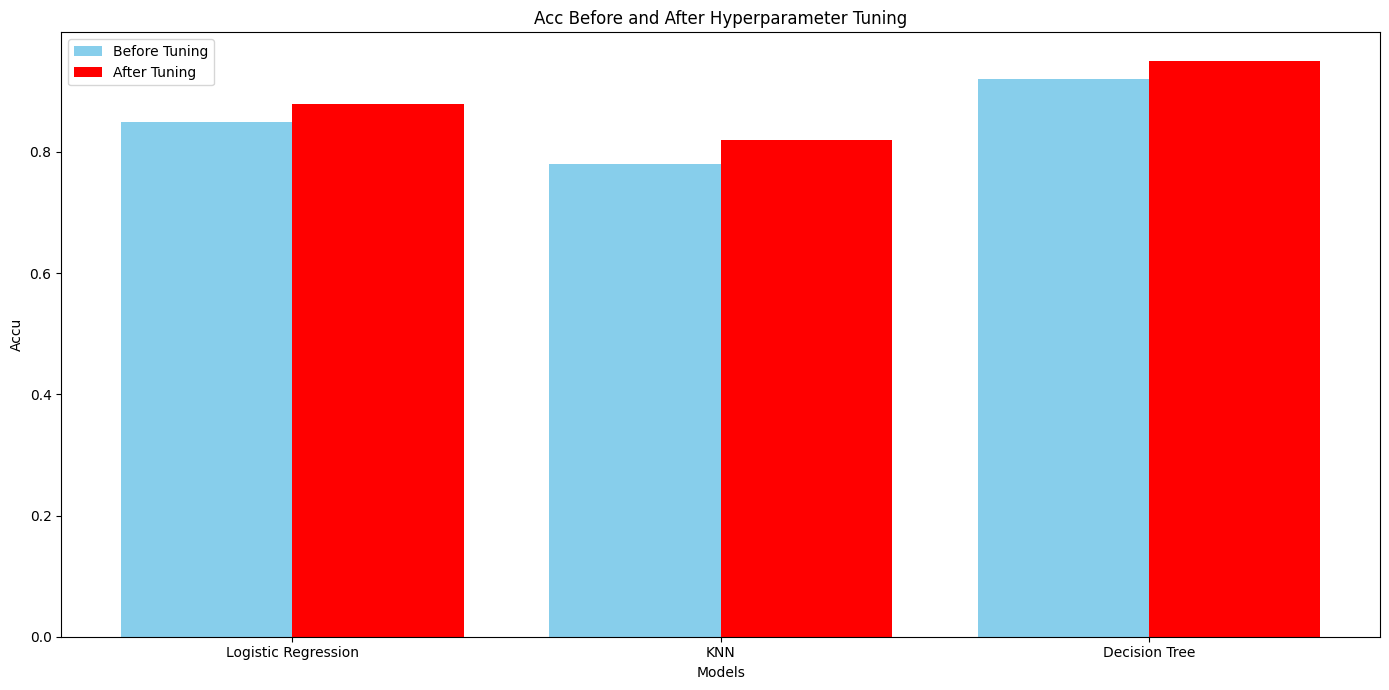

In [ ]:
import numpy as np
plt.figure(figsize=(14, 7))
bar_width = 0.40
index = np.arange(len(models))

# Bar plot to visualise accuracy before and after tuning
plt.bar(index, accuracies_before_tun, bar_width, color='skyblue', label='Before Tuning')
plt.bar(index + bar_width, accuracies_after_tun, bar_width, color='red', label='After Tuning')

plt.xlabel('Models')
plt.ylabel('Accu')
plt.title('Acc Before and After Hyperparameter Tuning')
plt.xticks(index + bar_width / 2, models)
plt.legend()

plt.tight_layout()
plt.show()

**Conclusion**<br>

The analysis of the dataset can be reveal significant insight relationship  between characteristic (such as type,body,acidity,price) it can also highlight the pricing trend high-rated wined explore the region produce top-rated wines. After hyperparametering through logic regression,KNN,Random forest analysis we finalized the **Decision Tree** is the best one for this investigation.<br>

KNN Algorithm: simple & intuitive algorithm this is a distance based algorithm Knn have the diffculty to handling high dimensional data.Compuying insufficient with larger dataset & categorical data can be diffcult to handle

Logic Regression Tree Under standable & implment to use & straight forward relationship.Computationally efficient making for suitable large dataset . In High effective scenerios we can use log reg.<br>

**Decision Tree**: Best algorithm for this dataset. Prove the overfitting for the strong choice.This tree manage quantitative & qualitative elements. It manage missing data & outliers.Non parametric models are called decision tree model.Feature impotant things.Limitations are in decision tree may overfit bias towards feature more level.They predict continous or complex relationship
